### Data exploration and Clustering Analysis

The goal of this analysis is to gain insights into the similarity between countries and regions by experimenting with different cluster amounts, using different clustering techniques

The data source is here https://www.cia.gov/the-world-factbook/references/guide-to-country-comparisons/

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN

In [79]:
df = pd.read_csv('Data/CIA_Country_Facts.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


### Let's explore the data

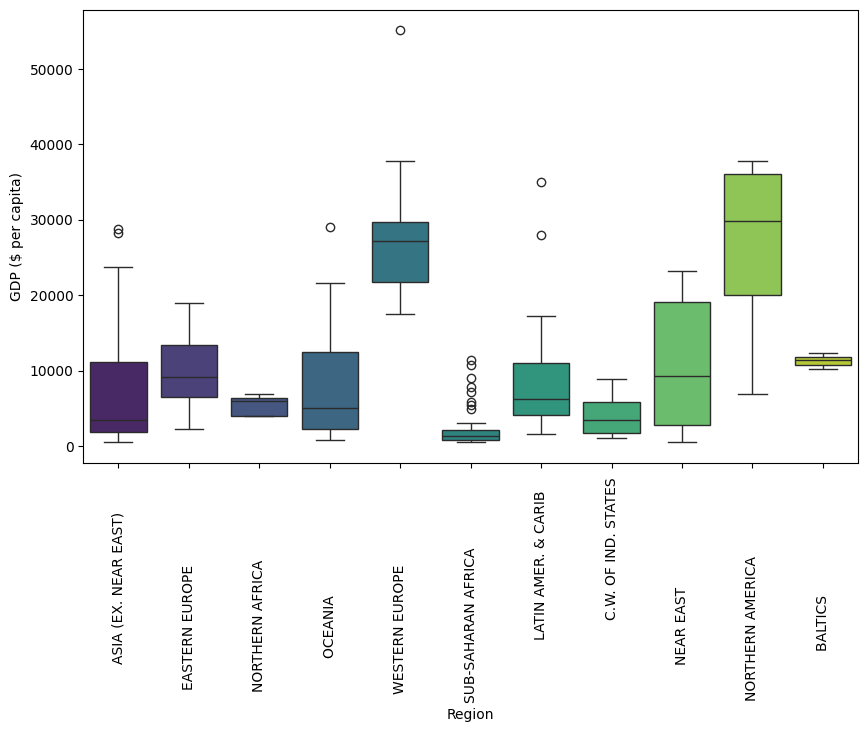

In [82]:
#Looking at the distribution of GDP, we see that western europe and North america have the highest GDPs
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=df,y='GDP ($ per capita)',x='Region', hue='Region',palette='viridis')
plt.xticks(rotation=90);

<AxesSubplot:>

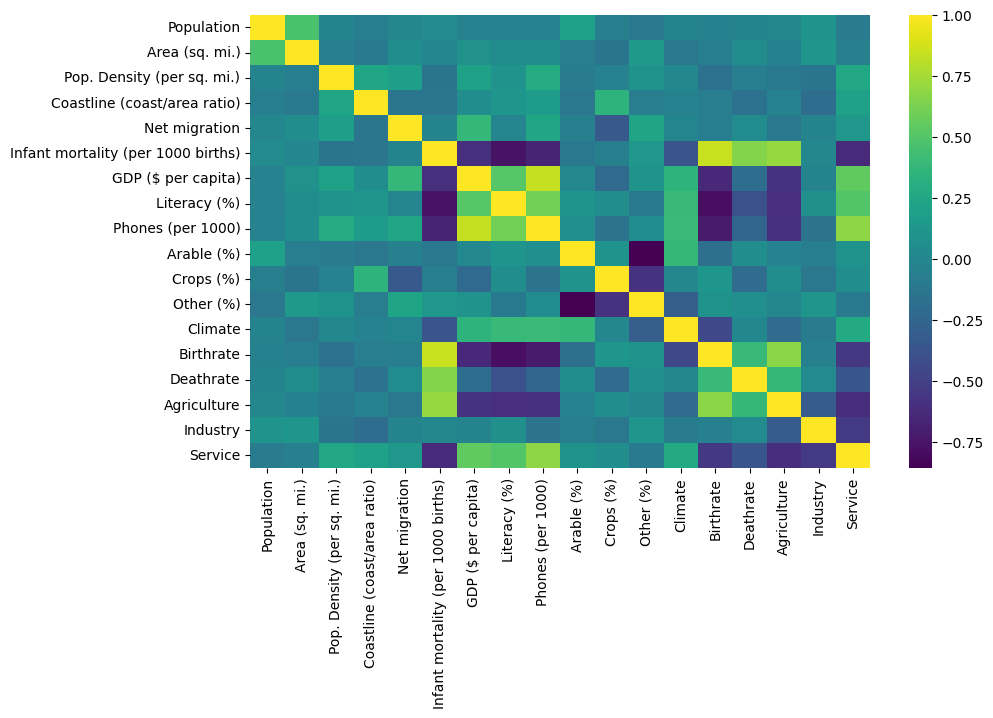

In [83]:
#Let's take a look at how the parameters are related to each other
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(df.drop(axis=1,columns=['Country','Region']).corr(),cmap='viridis')

<Figure size 3000x2000 with 0 Axes>

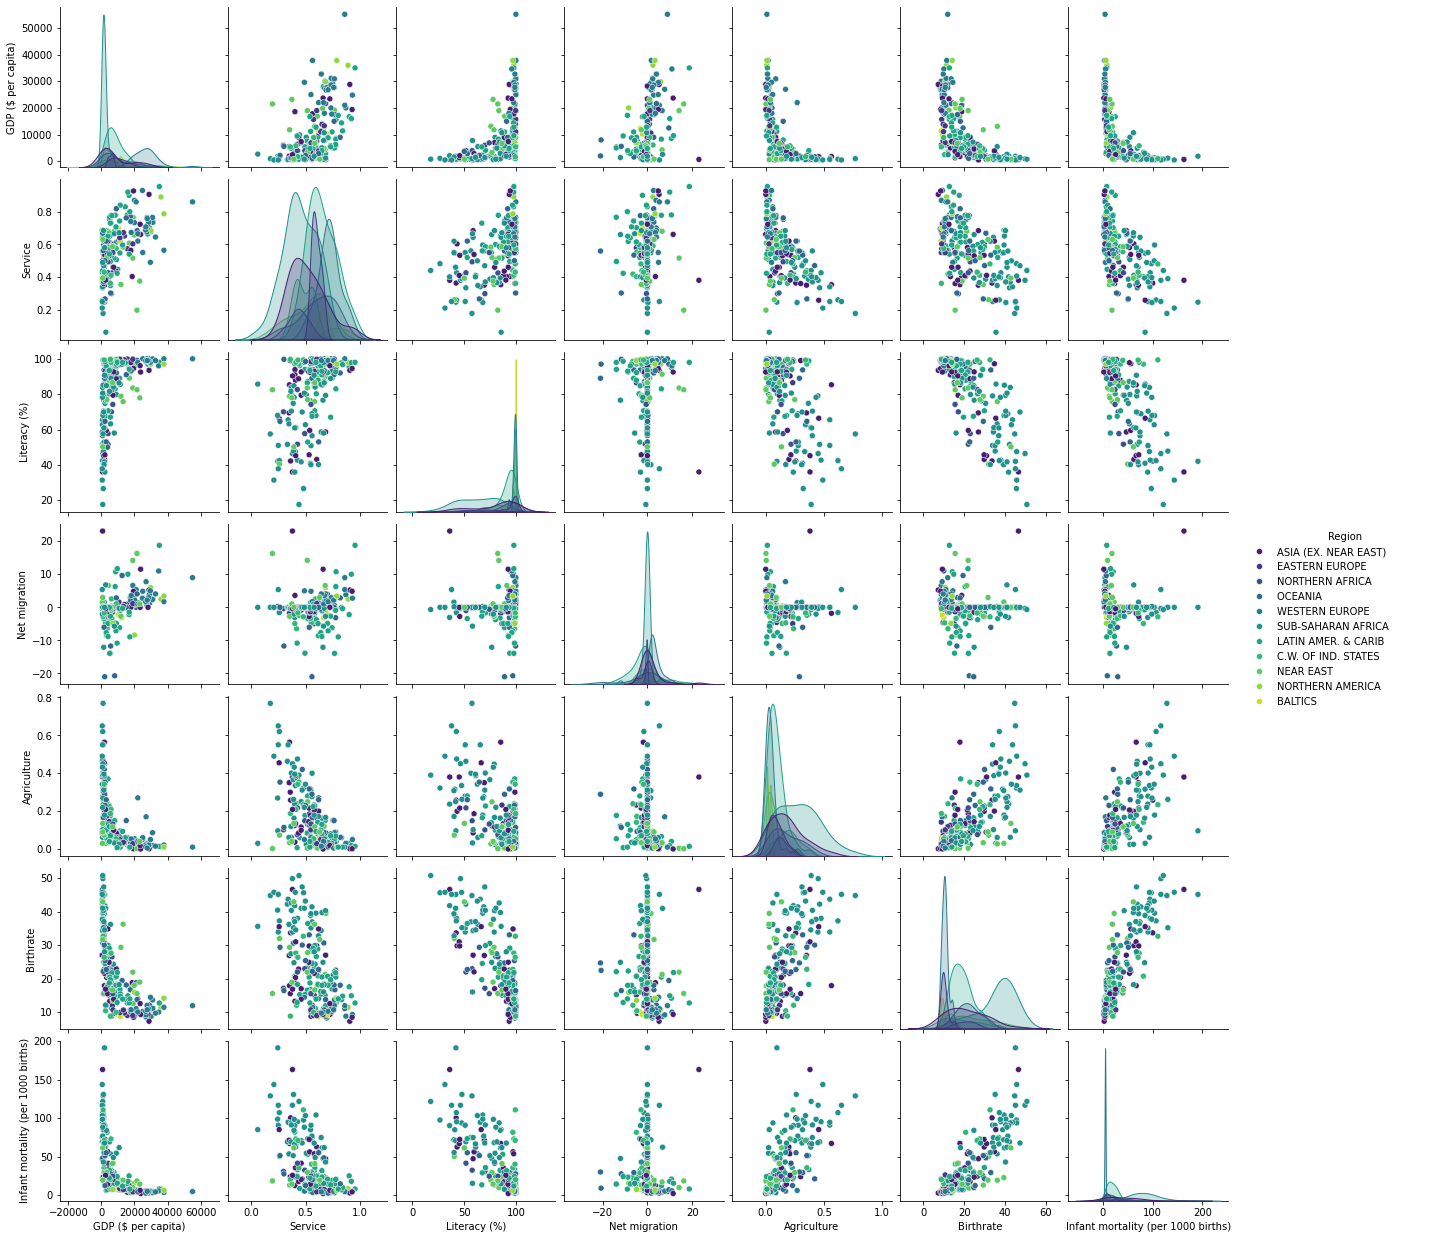

In [84]:
#From the heatmap, we can see that Service, Phones per 1000, literacy,Agriculture,Birthrate, Infant mortality and net migration are hiighly correlated with GDP
#Let's take a closer look at these features
plt.figure(figsize=(15,10),dpi=200)
sns.pairplot(df[['GDP ($ per capita)','Service','Literacy (%)','Net migration','Region','Agriculture','Birthrate','Infant mortality (per 1000 births)']], hue='Region',palette='viridis')

<AxesSubplot:xlabel='Literacy (%)', ylabel='GDP ($ per capita)'>

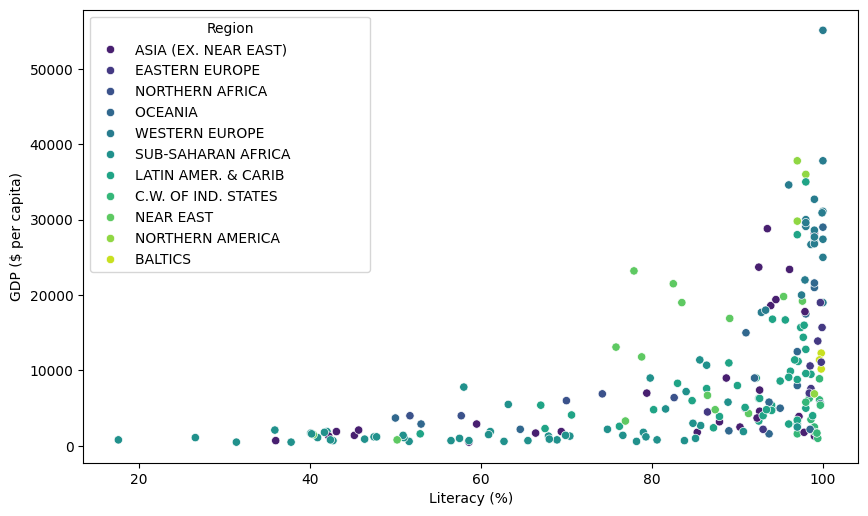

In [85]:
#Let's take a closer look at literacy, higher literacy is positively correlated with GDP
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(data=df,y='GDP ($ per capita)',x='Literacy (%)',hue='Region',palette='viridis')

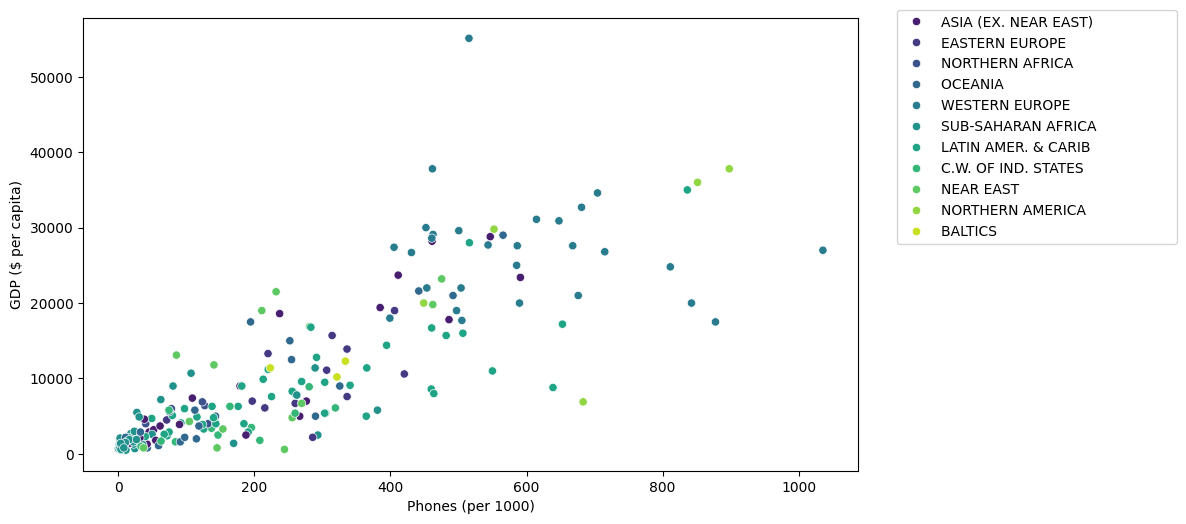

In [86]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(data=df,y='GDP ($ per capita)',x='Phones (per 1000)',hue='Region',palette='viridis')
plt.legend(loc=(1.05,0.5))

### Data Preparation

In [87]:
#Let's look at the number of null sin the data
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [88]:
#Starting with climate, let's see which rows are empty.
df[df['Climate'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,NaN,8.72,10.40,0.021,0.291,0.688
115,Lebanon,NEAR EAST,3874050,10400,372.5,2.16,0.00,24.52,4800.0,87.4,255.6,16.62,13.98,69.40,NaN,18.52,6.21,0.120,0.210,0.670
118,Libya,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.00,24.60,6400.0,82.6,127.1,1.03,0.19,98.78,NaN,26.49,3.48,0.076,0.499,0.425
120,Lithuania,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860


In [89]:
#We'll fill in the missing values based on the mean climate of the region the country is located in
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                                0
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [90]:
#We'll do the same thing for literacy
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                           0
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                                0
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [91]:
#Let's look at the rows for which agriculture is missing
df[df['Agriculture'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.000000,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.000000,8.71,6.25,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,98.391304,877.7,0.00,0.00,100.00,3.095238,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,97.750000,448.9,0.00,0.00,100.00,1.000000,15.93,7.84,NaN,NaN,NaN
83,Guam,OCEANIA,171019,541,316.1,23.20,0.00,6.94,21000.0,99.000000,492.0,9.09,16.36,74.55,2.000000,18.79,4.48,NaN,NaN,NaN
134,Mayotte,SUB-SAHARAN AFRICA,201234,374,538.1,49.52,6.78,62.40,2600.0,62.510000,49.7,NaN,NaN,NaN,2.000000,40.95,7.70,NaN,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.000000,NaN,20.00,0.00,80.00,2.000000,17.59,7.10,NaN,NaN,NaN
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,88.835294,143.0,0.00,0.00,100.00,2.000000,24.76,6.70,NaN,NaN,NaN
153,N. Mariana Islands,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,97.000000,254.7,13.04,4.35,82.61,2.000000,19.43,2.29,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,0.00,19.00,2500.0,97.000000,293.3,12.90,0.00,87.10,1.885417,12.13,6.53,NaN,NaN,NaN


In [92]:
#Most of the countries where agriculture is missing are small islands, Industry and Service are also missing for these countries, we can safely set them all to 0
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

In [93]:
#Now we can drop the rows with any missing data, as there are very few rows
df = df.dropna()

### Data feature prep

In [94]:
#We can remove the Country identifier column and one hot encode Region
X=df.drop('Country',axis=1)
X = pd.get_dummies(X,drop_first=True)

X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True


In [96]:
#Now we'll scale the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

Text(0, 0.5, ' Sum of Squared Distances')

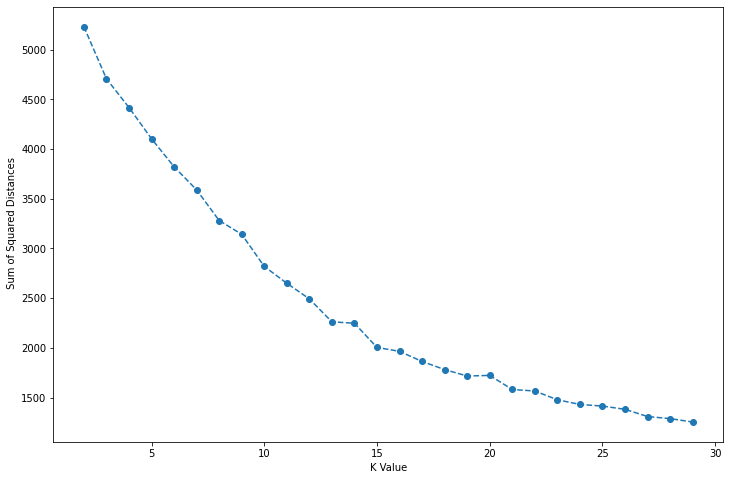

In [99]:
#We'll now fit a K means model with various K, and plot the sum of square distance to select the best K

ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [119]:
#From the graph, it look like the sum of square distance flattens out around 15
#Let's create a model based on this and see which features are important for this
model = KMeans(n_clusters=15)
model.fit(scaled_X)

X['KMeans_label'] = model.labels_
np.abs(X.corr()['KMeans_label']).sort_values()

Industry                                      0.004461
Region_SUB-SAHARAN AFRICA                     0.013382
Deathrate                                     0.019999
Climate                                       0.046329
Net migration                                 0.051212
Region_EASTERN EUROPE                         0.071360
Coastline (coast/area ratio)                  0.083758
Crops (%)                                     0.090580
Birthrate                                     0.102973
Region_OCEANIA                                0.104408
Pop. Density (per sq. mi.)                    0.116353
Phones (per 1000)                             0.124884
GDP ($ per capita)                            0.135863
Arable (%)                                    0.141653
Literacy (%)                                  0.142463
Infant mortality (per 1000 births)            0.157814
Other (%)                                     0.165511
Region_WESTERN EUROPE                         0.186071
Service   

In [ ]:
#For the 15 cluster, the top 5 features are Area (sq. mi.),Region_BALTICS, Region_NORTHERN AMERICA,Region_C.W. OF IND. STATES,Region_LATIN AMER. & CARIB        

<Figure size 3000x2000 with 0 Axes>

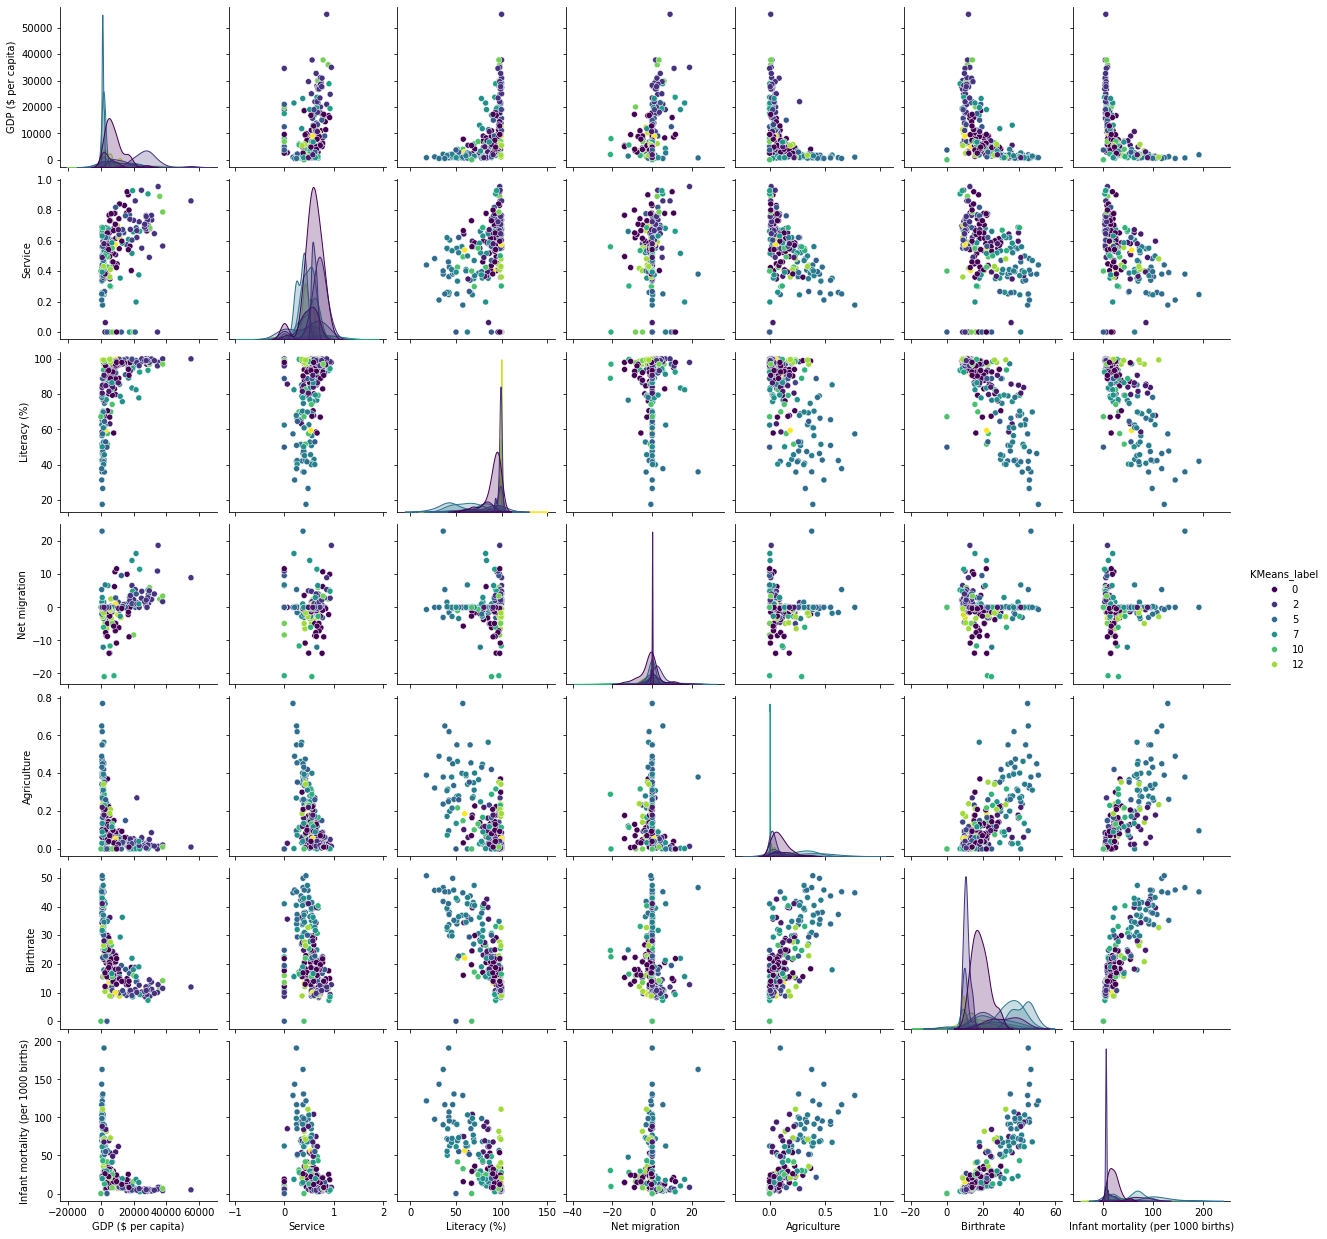

In [163]:
#Let's look at the features important to GDP clustered by the K means labels
plt.figure(figsize=(15,10),dpi=200)
sns.pairplot(X[['GDP ($ per capita)','Service','Literacy (%)','Net migration','Agriculture','Birthrate','Infant mortality (per 1000 births)','KMeans_label']], hue='KMeans_label',palette='viridis')